## &#x1F4C8; Signals in Time

### &#x1F3F7; Exploring a sound sample

In [1]:
using SignalAnalysis, SignalAnalysis.Units, Plots

In [2]:
cfpo = signal("data/cfpo1.wav");

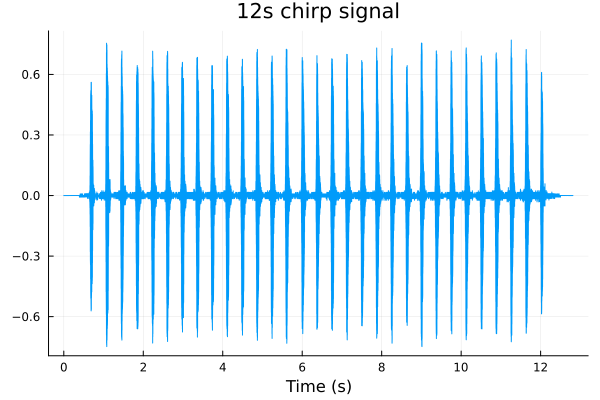

In [3]:
plot(cfpo, title = "12s chirp signal")

In [4]:
framerate(cfpo)

8000.0f0

In [5]:
nframes(cfpo)

102528

In [6]:
duration(cfpo)

12.816f0

In [7]:
t₀ = 2s;

In [8]:
t₁ = t₀ + 180ms
one_chirp = plot(cfpo[t₁:t₁ + 200ms], title = "Signal Excerpt at 2s");

In [9]:
t₂ = t₀ + 225ms
chirp_zoomed = plot(cfpo[t₂:t₂ + 10.1ms], title = "Chirp Zoomed for 10ms");

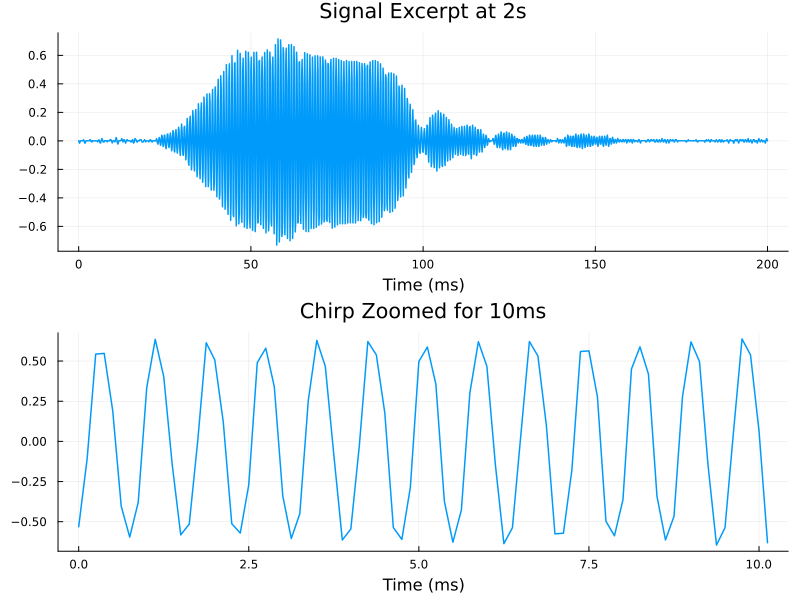

In [10]:
plot(one_chirp, chirp_zoomed
    ; layout=(2,1), size = ( 800, 600), linewidth = 1.5
)

### &#x1F3F7; Analysing Frequencies

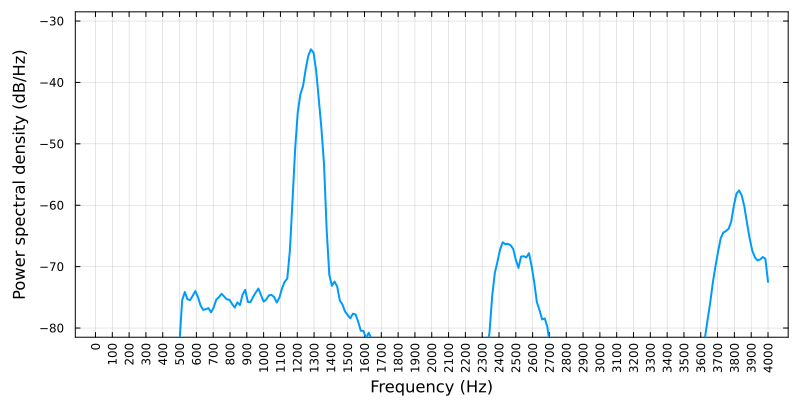

In [11]:
# Fourier spectrum of the call of an owl
psd(cfpo; xticks=0:100:4000
    , xrot=90
    , size = ( 800, 400), linewidth=2
    , widen =true
    , framestyle = :box
    , bottom_margin = 5Plots.mm, left_margin = 5Plots.mm
)

In [12]:
sp0 = specgram(cfpo; color=:grayC
    , size = (800, 300)
    , bottom_margin = 5Plots.mm, left_margin = 5Plots.mm
)
savefig(sp0, "images/sp0.png");

<img src="images/sp0.png" width='' height='' > </img>

### &#x1F3F7; Filtering

&#x1F4DD; Making filters with `fir()`

In [13]:
𝑓ₛ = 8kHz

8 kHz

In [14]:
# Constructing a low-pass filter
lpf = fir(127, 0, 2kHz; fs=𝑓ₛ);

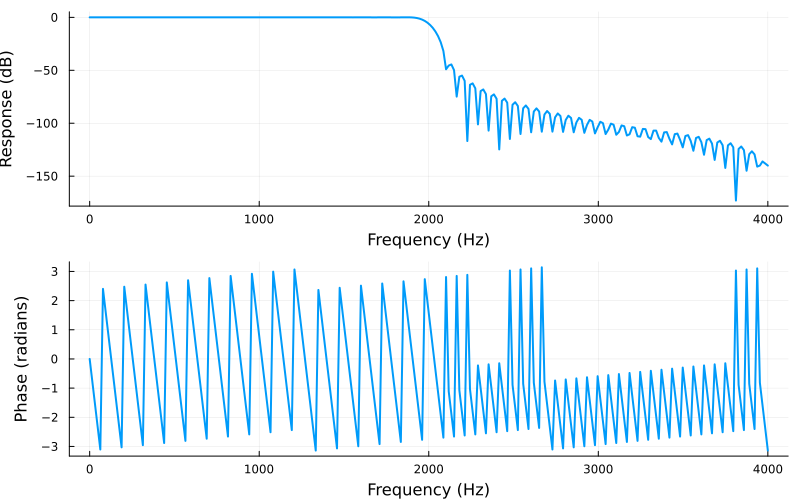

In [15]:
# Frequency reponse of a low-pass filter
plotfreqresp(lpf; fs=𝑓ₛ, linewidth=2    , size = (800, 500))

&#x1F4DD; Applying Filters

In [16]:
cfpo_lp = sfilt(lpf, cfpo[1:nframes(cfpo)]);

In [17]:
using Plots.PlotMeasures

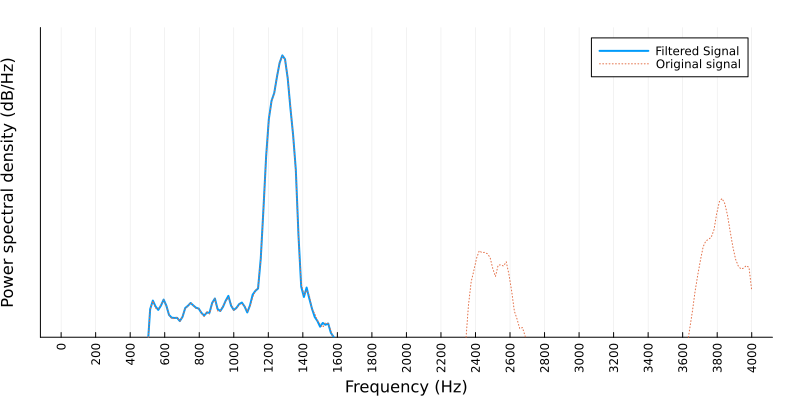

In [18]:
psd(cfpo_lp; 
    linewidth=2,label="Filtered Signal", legend=true
    , size = (800,400)
)
psd!(cfpo;
    ls=:dot, ticks=0:200:4000, xrot=90
    , label="Original signal", legend=true, margin=5mm
)

In [19]:
sp1 = specgram(cfpo_lp; color=:grayC
    , size = (800, 300)
    , bottom_margin = 5Plots.mm, left_margin = 5Plots.mm
)
savefig(sp1, "images/sp1.png");

<img src="images/sp1.png" width='' height='' > </img>

&#x1F4DD; Synthetic Signals

In [20]:
sin1000_2050 = signal(sin.((0.0:1.0/8000:1.0)*2π*1000) .+ 
                        0.5 .* sin.((0.0:1.0/8000:1.0)*2π*2050), 8000);

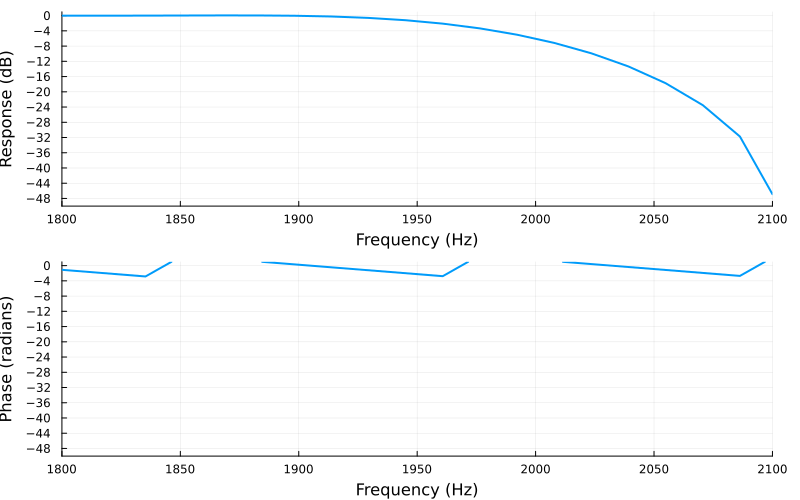

In [21]:
# Frequency reponse of a low-pass filter
plotfreqresp(lpf; 
    fs=𝑓ₛ
    , xrange=(1800,2100), yrange=(-50,1)
    , xticks=1800:50:2100, yticks=0:-4:-50
    , linewidth=2
    , size = (800, 500)
    , right_margin=5mm
)

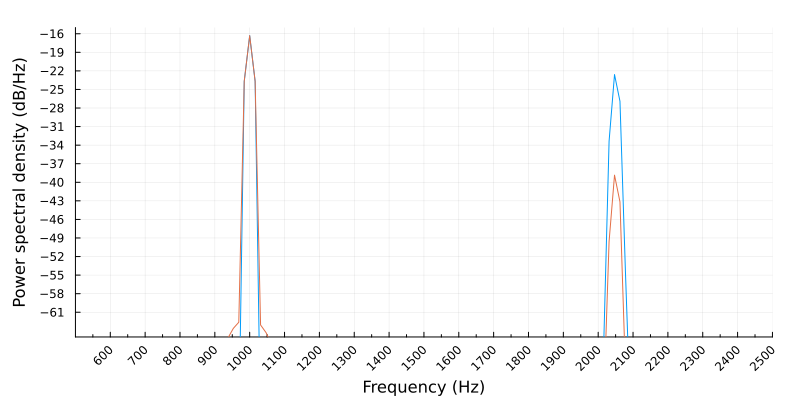

In [22]:
pl3 = psd(sin1000_2050; 
    xrange=(500,2500)
    , xticks=600:100:2500, xminorticks=2, xrot=45
    , yticks=-61:3:-02
    , margin=5mm
    , size = (800,400)
)
psd!(sfilt(lpf,sin1000_2050); 
    xrange=(500,2500)
    , xticks=600:100:2500, xminorticks=2, xrot=45
    , yticks=-61:3:-02
    , margin=5mm
    , size = (800,400)
)
display(pl3)

&#x1F4DD; Saving Signals

In [24]:
using WAV

In [25]:
wavwrite(cfpo_lp, "data/cfpo_lp.wav", compression=WAVE_FORMAT_PCM, nbits=8)

In [27]:
scaled = sin1000_2050 ./ maximum(sin1000_2050);

In [34]:
wavwrite(scaled, "data/sin1000_2050.wav", compression=WAVE_FORMAT_PCM, nbits=8)

&#x1F4DD; Listening to Signal

In [58]:
audioplayer(filepath) = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Should display audio player</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="$filepath" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """;

In [59]:
display("text/html", audioplayer("data/sin1000_2050.wav"))

Should display audio player 
 

 
 
 
 Your browser does not support the audio element.

In [63]:
using IJulia

# Display the audio file
display("audio/wav", open("data/sin1000_2050.wav", "r"))


LoadError: MethodError: no method matching show(::IOContext{Base64EncodePipe}, ::MIME{Symbol("audio/wav")}, ::IOStream)

[0mClosest candidates are:
[0m  show(::IO, [91m::MIME{Symbol("text/plain")}[39m, ::Any)
[0m[90m   @[39m [90mBase[39m [90m[4mmultimedia.jl:47[24m[39m
[0m  show(::IO, ::M, [91m::PlutoUI.AsMIME{M}[39m) where M<:MIME
[0m[90m   @[39m [33mPlutoUI[39m [90m~/.julia/packages/PlutoUI/Hlswo/src/[39m[90m[4mDisplayTricks.jl:12[24m[39m
[0m  show(::IO, ::M, [91m::Show{M}[39m) where M<:MIME
[0m[90m   @[39m [33mPlutoUI[39m [90m~/.julia/packages/PlutoUI/Hlswo/src/[39m[90m[4mDisplayTricks.jl:89[24m[39m
[0m  ...


# References
- [ ] [Practical Julia: A Hands-On Introduction for Scientific Minds by Lee Phillips](https://nostarch.com/practical-julia)